In [1]:
import torch
import numpy as np

Tensory w PyTorchu to specjalne struktury danych, które przypominają tablice/macierze. Używamy ich do przechowywania wejśc/wyjść z sieci, jak również wag modelu.
Tensory przypominają swoją budową tablice numpy https://numpy.org/, z zasadniczą różnicą, ktorą jest łatwa możliwość przechowywania i operowania na tensorach na kartach graficznych.

Tensory mogą być tworzone w różny sposób:
1. Ze standardowych tablic

In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

2. Na podstawie tablic numpy

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

3. Na podstawie innych tensorów

In [4]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4070, 0.8224],
        [0.2808, 0.2243]]) 



4. Z losowymi lub stałymi wartościami

In [5]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
print(f"Random Tensor: \n {rand_tensor} \n")
ones_tensor = torch.ones(shape)
print(f"Ones Tensor: \n {ones_tensor} \n")
zeros_tensor = torch.zeros(shape)
print(f"Zeros Tensor: \n {zeros_tensor} \n")

Random Tensor: 
 tensor([[0.6845, 0.6889, 0.7979],
        [0.7639, 0.7036, 0.8765]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



### Atrybuty tensorów

In [6]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Operacje na tensorach

Nie ma co się bać dokumentacji! (Jest bardzo przyjemnie napisana) Wszystkie operacje na tensorach są opisane tutaj: https://pytorch.org/docs/stable/torch.html
Standardowo operacje są uruchamiane na CPU, ale można przenosić tensory, całe modele i **wszystkie operacje** na GPU (co zazwyczaj jest szybsze) za pomocą prostej komendy. Przetestujemy to w kolejnych częściach laboratorium.

#### Standardowe indeksowanie i slicing

In [7]:
tensor = torch.ones(4, 4)
print('First row: ', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[:, -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


#### Transponowanie tensorów

In [8]:
tensor = torch.ones(4, 3)
tensor[:,1] = 0
tensor[:,2] = 2
print(tensor)
print(f"Tensor shape:{tensor.shape}\n")
tensor2 = tensor.T
print(tensor2)
print(f"Transposed tensor shape:{tensor2.shape}")

tensor([[1., 0., 2.],
        [1., 0., 2.],
        [1., 0., 2.],
        [1., 0., 2.]])
Tensor shape:torch.Size([4, 3])

tensor([[1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [2., 2., 2., 2.]])
Transposed tensor shape:torch.Size([3, 4])


#### Zmiana wymiarów

In [9]:
tensor = torch.ones([10])
print(tensor)
print(f"Tensor shape:{tensor.shape}\n")

tensor2 = tensor.unsqueeze(dim=0)
print(tensor2)
print(f"Tensor shape:{tensor2.shape}\n")

tensor3 = tensor.unsqueeze(dim=1)
print(tensor3)
print(f"Tensor shape:{tensor3.shape}\n")

tensor4 = tensor.view(5,2)
print(tensor4)
print(f"Tensor shape:{tensor4.shape}\n")

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
Tensor shape:torch.Size([10])

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
Tensor shape:torch.Size([1, 10])

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
Tensor shape:torch.Size([10, 1])

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])
Tensor shape:torch.Size([5, 2])



#### Łączenie tensorów

In [10]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [11]:
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [12]:
t1 = torch.stack([tensor, tensor, tensor])
print(t1)

tensor([[[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]])


In [13]:
t1 = torch.stack([tensor, tensor, tensor],dim=0)
print(t1.shape)
t1 = torch.stack([tensor, tensor, tensor],dim=1)
print(t1.shape)
t1 = torch.stack([tensor, tensor, tensor],dim=2)
print(t1.shape)

torch.Size([3, 4, 4])
torch.Size([4, 3, 4])
torch.Size([4, 4, 3])


In [14]:
t1 = torch.stack([tensor, tensor, tensor],dim=3)
print(t1.shape)

IndexError: Dimension out of range (expected to be in range of [-3, 2], but got 3)

#### Operacje arytmetyczne

In [15]:
print(tensor)
print(tensor+2)
print(tensor*5)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[3., 2., 3., 3.],
        [3., 2., 3., 3.],
        [3., 2., 3., 3.],
        [3., 2., 3., 3.]])
tensor([[5., 0., 5., 5.],
        [5., 0., 5., 5.],
        [5., 0., 5., 5.],
        [5., 0., 5., 5.]])


#### Operacje na elementach

In [16]:
tensor * tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [17]:
tensor + tensor

tensor([[2., 0., 2., 2.],
        [2., 0., 2., 2.],
        [2., 0., 2., 2.],
        [2., 0., 2., 2.]])

In [18]:
rand_tensor = torch.rand(4,4)*10
print(rand_tensor)
print(rand_tensor / tensor)

tensor([[4.8396, 7.7879, 4.1868, 4.8463],
        [8.0500, 3.7236, 2.9777, 9.2651],
        [8.6896, 4.4343, 9.9098, 8.7157],
        [4.1358, 7.7793, 5.4021, 4.3797]])
tensor([[4.8396,    inf, 4.1868, 4.8463],
        [8.0500,    inf, 2.9777, 9.2651],
        [8.6896,    inf, 9.9098, 8.7157],
        [4.1358,    inf, 5.4021, 4.3797]])


In [19]:
rand_tensor = torch.rand(4,4)*10
print(rand_tensor // tensor)
print((tensor / tensor).type())

tensor([[4., inf, 7., 6.],
        [9., inf, 6., 5.],
        [9., inf, 4., 4.],
        [2., inf, 8., 6.]])
torch.FloatTensor


/var/folders/_1/grmv219n3mzbyfj882m03j3c0000gn/T/ipykernel_4835/688280322.py:2: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  print(rand_tensor // tensor)


### Mini zadanie

Stwórz kwadratową macierz dwuwymiarową, której wartości będą kolejnymi numerami od 1 do zadanej liczby x. Możesz założyć, że pierwiastek kwadratowy z x jest liczbą całkowitą np. dla x=16 powinniśmy otrzymać wyjście. (Pętle są fujka :/ i zabronione)

In [24]:
x = 16

torch.arange(1, x+1).view(int(np.sqrt(x)), int(np.sqrt(x)))

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]])

Hint: https://pytorch.org/docs/stable/torch.html

### Operacje macierzowe

In [27]:
tensor = torch.ones(4, 3)
tensor[1,:] = 0
print(tensor)
print(tensor.T)

tensor([[1., 1., 1.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [28]:
y1 = tensor.matmul(tensor.T)
print(y1,"\n")
y2 = tensor @ tensor.T
print(y2)

tensor([[3., 0., 3., 3.],
        [0., 0., 0., 0.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.]]) 

tensor([[3., 0., 3., 3.],
        [0., 0., 0., 0.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.]])


### Zaawansowany przykład - regresja

Dla wszystkich, którzy potrzebują powtórki z matmy: https://mml-book.github.io/

In [29]:
apples_kg_ordered = [2,4,7,3,13]
plums_kg_ordered = [3,8,9,1,1]
prices = [11.97 , 28.05, 38.98, 10.96, 41.1]

In [30]:
X = torch.tensor([apples_kg_ordered, plums_kg_ordered])
Y = torch.tensor(prices)
print(X)
print(Y)

tensor([[ 2,  4,  7,  3, 13],
        [ 3,  8,  9,  1,  1]])
tensor([11.9700, 28.0500, 38.9800, 10.9600, 41.1000])


In [31]:
X = X.T.float()
Y = Y.T
X

/var/folders/_1/grmv219n3mzbyfj882m03j3c0000gn/T/ipykernel_4835/2705259845.py:2: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:2985.)
  Y = Y.T


tensor([[ 2.,  3.],
        [ 4.,  8.],
        [ 7.,  9.],
        [ 3.,  1.],
        [13.,  1.]])

In [32]:
theta = torch.inverse((X.T@X))@X.T@Y
theta 

tensor([3.0065, 1.9963])

In [33]:
X @ theta

tensor([12.0020, 27.9967, 39.0126, 11.0159, 41.0810])

# Automatyczne obliczanie gradientu

Do automatycznego obliczania gradientu służy wbudowany pakiet torch.autograd, który umożliwia automatyczne obliczanie gradientu dla dowolnego grafu (ciągu obliczeń)

In [34]:
x = torch.ones(5, requires_grad=True)
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


In [35]:
y = x + 2
y

tensor([3., 3., 3., 3., 3.], grad_fn=<AddBackward0>)

In [36]:
y = x * 2
y

tensor([2., 2., 2., 2., 2.], grad_fn=<MulBackward0>)

In [37]:
y = x @ x.T
y

tensor(5., grad_fn=<DotBackward0>)

In [38]:
y = x - 2
y

tensor([-1., -1., -1., -1., -1.], grad_fn=<SubBackward0>)

In [39]:
y.grad_fn.next_functions[0][0]

In [40]:
y.grad_fn.next_functions[0][0].variable

tensor([1., 1., 1., 1., 1.], requires_grad=True)

In [41]:
z = y * y * 3

In [42]:
a = z.mean()
print(z)
print(a)

tensor([3., 3., 3., 3., 3.], grad_fn=<MulBackward0>)
tensor(3., grad_fn=<MeanBackward0>)


In [43]:
from torchviz import make_dot

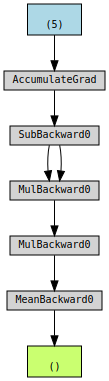

In [44]:
make_dot(a)

### Propagacja wsteczna gradientu

In [45]:
x = torch.ones(1, requires_grad=True)
print(x)
y = (x+4)**3
y

tensor([1.], requires_grad=True)


tensor([125.], grad_fn=<PowBackward0>)

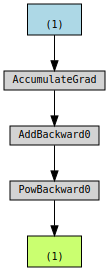

In [46]:
make_dot(y)

In [47]:
y.backward()
x.grad

tensor([75.])

#### Obliczenia z pominięciem gradientów

In [48]:
t1 = torch.rand(3,4, requires_grad=True)
t2 = torch.rand(4,3, requires_grad=True)
with torch.no_grad():
    y = t1@t2
print(y)
print(t1@t2)

tensor([[1.8111, 1.9185, 1.9279],
        [1.6998, 1.8824, 1.9733],
        [1.0479, 1.1462, 0.9463]])
tensor([[1.8111, 1.9185, 1.9279],
        [1.6998, 1.8824, 1.9733],
        [1.0479, 1.1462, 0.9463]], grad_fn=<MmBackward0>)


#### Funkcja backward pozwala nam policzyć pochodną cząstkową w punkcie dla wszystkich źródeł (liści w grafie obliczeń)

In [49]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output

In [50]:
w = torch.randn(5, 3, requires_grad=True) #weights
b = torch.randn(3, requires_grad=True) #bias

In [51]:
z = torch.matmul(x, w)+b

In [52]:
loss = torch.abs((z-y)).mean()
loss

tensor(1.5580, grad_fn=<MeanBackward0>)

In [53]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[ 0.3333, -0.3333,  0.3333],
        [ 0.3333, -0.3333,  0.3333],
        [ 0.3333, -0.3333,  0.3333],
        [ 0.3333, -0.3333,  0.3333],
        [ 0.3333, -0.3333,  0.3333]])
tensor([ 0.3333, -0.3333,  0.3333])


# Regresja raz jeszcze

In [54]:
apples_kg_ordered = [2,4,7,3,13]
plums_kg_ordered = [3,8,9,1,1]
prices = [11.97 , 28.05, 38.98, 10.96, 41.1]

In [55]:
X = torch.tensor([apples_kg_ordered,plums_kg_ordered])
Y = torch.tensor(prices)
X = X.T.float()
Y = Y.T
print(X)
print(Y)

tensor([[ 2.,  3.],
        [ 4.,  8.],
        [ 7.,  9.],
        [ 3.,  1.],
        [13.,  1.]])
tensor([11.9700, 28.0500, 38.9800, 10.9600, 41.1000])


In [56]:
params = torch.rand(2,requires_grad=True)

In [57]:
y_pred = X@params
y_pred

tensor([1.8350, 4.1985, 6.0263, 1.8278, 7.0399], grad_fn=<MvBackward0>)

In [58]:
loss = (torch.square(Y-y_pred)).mean()
loss

tensor(600.2085, grad_fn=<MeanBackward0>)

In [59]:
loss.backward()

In [60]:
params.grad

tensor([-326.6116, -224.3970])

In [61]:
lr = 0.001

In [62]:
print(params)
params - lr *params.grad

tensor([0.5212, 0.2642], requires_grad=True)


tensor([0.8478, 0.4886], grad_fn=<SubBackward0>)

In [63]:
params = torch.rand(2,requires_grad=True)

In [64]:
for epoch in range(50):
    y_pred = X@params
    loss = (torch.square(Y-y_pred)).mean()
    loss.backward()
    with torch.no_grad():
        params.copy_(params - lr *params.grad) # podstawienie pod params nowej wartości
    print(f"Param values: {params[0]:.5}, {params[1]:.5}", f"Gradients: {params.grad[0]:.4}, {params.grad[1]:.4} ")
    # Zerujemy gradienty
    params.grad.zero_()

Param values: 1.2044, 0.69362 Gradients: -275.1, -190.4 
Param values: 1.4434, 0.85925 Gradients: -239.0, -165.6 
Param values: 1.651, 1.0034 Gradients: -207.7, -144.1 
Param values: 1.8314, 1.1288 Gradients: -180.4, -125.4 
Param values: 1.9881, 1.2379 Gradients: -156.7, -109.1 
Param values: 2.1242, 1.3329 Gradients: -136.1, -94.99 
Param values: 2.2425, 1.4156 Gradients: -118.2, -82.69 
Param values: 2.3451, 1.4876 Gradients: -102.7, -72.0 
Param values: 2.4343, 1.5503 Gradients: -89.16, -62.7 
Param values: 2.5117, 1.6049 Gradients: -77.41, -54.62 
Param values: 2.5789, 1.6525 Gradients: -67.21, -47.58 
Param values: 2.6372, 1.6939 Gradients: -58.34, -41.47 
Param values: 2.6879, 1.7301 Gradients: -50.64, -36.15 
Param values: 2.7318, 1.7616 Gradients: -43.94, -31.53 
Param values: 2.7699, 1.7891 Gradients: -38.12, -27.5 
Param values: 2.803, 1.8131 Gradients: -33.07, -24.0 
Param values: 2.8317, 1.8341 Gradients: -28.68, -20.96 
Param values: 2.8566, 1.8524 Gradients: -24.87, -18.

### Zadanie
Tym razem na innym targu do ceny owoców doliczany jest stały koszt reklamówki. Napisz model regresji liniowej, który oszacuje cenę kg ziemniaków, pomidorów i reklamówki

In [100]:
potatoes_kg_ordered = [1,3,7,3,10,6,8,4,3,1,2,0]
tomatoes_kg_ordered = [5,2,3,1,2,3,6,7,3,2,3,1]
prices = [22.37 , 14.45, 26.6, 10.44, 28.49, 24.52, 40.38, 36.51, 18.50, 10.46, 16.51, 4.58]

In [107]:
X = torch.tensor([potatoes_kg_ordered,
                  tomatoes_kg_ordered])

X = X.T.float()

Y = torch.tensor(prices)

In [108]:
params = torch.rand(2, requires_grad=True)

In [111]:
bag_price = torch.rand(1, requires_grad=True)

for epoch in range(50):
    y_pred = X @ params + bag_price
    loss = (torch.square(Y - y_pred)).mean()
    loss.backward()
    with torch.no_grad():
        params.copy_(params - lr * params.grad) # podstawienie pod params nowej wartości
    print(f"Param values: {params[0]:.5}, {params[1]:.5}", f"Gradients: {params.grad[0]:.4}, {params.grad[1]:.4} ")
    # Zerujemy gradienty
    params.grad.zero_()

Param values: 0.8701, 0.27253 Gradients: -169.9, -137.7 
Param values: 1.0278, 0.40186 Gradients: -157.7, -129.3 
Param values: 1.174, 0.52337 Gradients: -146.3, -121.5 
Param values: 1.3097, 0.6376 Gradients: -135.6, -114.2 
Param values: 1.4354, 0.74503 Gradients: -125.7, -107.4 
Param values: 1.552, 0.84612 Gradients: -116.5, -101.1 
Param values: 1.6599, 0.94128 Gradients: -107.9, -95.17 
Param values: 1.7599, 1.0309 Gradients: -99.95, -89.64 
Param values: 1.8524, 1.1154 Gradients: -92.5, -84.49 
Param values: 1.9379, 1.1951 Gradients: -85.57, -79.67 
Param values: 2.017, 1.2703 Gradients: -79.12, -75.18 
Param values: 2.0902, 1.3413 Gradients: -73.11, -70.99 
Param values: 2.1577, 1.4083 Gradients: -67.51, -67.07 
Param values: 2.22, 1.4717 Gradients: -62.3, -63.42 
Param values: 2.2774, 1.5317 Gradients: -57.46, -60.0 
Param values: 2.3304, 1.5886 Gradients: -52.94, -56.81 
Param values: 2.3791, 1.6424 Gradients: -48.74, -53.83 
Param values: 2.4239, 1.6934 Gradients: -44.83, -5